In [1]:
%jsroot off

In [2]:
//#define HZZAnalysis_cxx
//#include"HZZAnalysis.h"
//#include"HZZAnalysisHistograms.h"
//#include"main_HZZAnalysis.C"
#include"selecEvent_case.cpp"
#include<iostream> ////
#include<cstring>
#include<string>
#include<TH1.h> ////
#include<TH2.h> ////
#include<TH3.h>
#include<TStyle.h>
#include<TMath.h>
#include<TLorentzVector.h>
#include<TROOT.h>
#include<TChain.h>
#include<TFile.h>
#include<TSelector.h>
#include<vector>
using namespace std;

### Adaptación de run.sh

#### Which option should I run?
Options are:

0 = run all data and MC one after another

1 = run data only

2,3 = run MC samples only

In [3]:
Int_t option=1; //option
cout << "Option: " << option;

Option: 1

#### Should I use PROOF? (will make things faster)
Options are:

0 = NO

1 = YES

In [4]:
Int_t parallel=0; //option
cout << "Option: " << parallel;

Option: 0

In [5]:
TString path  = "/home/student/HZZ4l/4lep/";
TString path2 = "/media/sf_carpeta_compartida_MV/2lep/";

TChain *fChain = new TChain("mini");

//////////////////////  Data samples
//option=1 or 0  

fChain->AddFile(path+"Data/data_A.4lep.root");
fChain->AddFile(path+"Data/data_B.4lep.root");
fChain->AddFile(path+"Data/data_C.4lep.root");
fChain->AddFile(path+"Data/data_D.4lep.root");

In [6]:
TH1F *hist_mLL1         = 0;
TH1F *hist_mLL2         = 0;

TH1F *hist_fourlepsys_pt  = 0;
TH1F *hist_fourlepsys_y   = 0;

TH1F *mass_four_lep      = 0;
TH1F *mass_ext_four_lep  = 0;

TH1F *hist_n_jets        = 0;

// Leading Lepton histograms
TH1F *hist_fourleptpt   = 0;
TH1F *hist_fourlepteta  = 0;
TH1F *hist_fourleptE    = 0;
TH1F *hist_fourleptphi  = 0;
TH1F *hist_fourleptch   = 0;
TH1F *hist_fourleptID   = 0;
TH1F *hist_fourlept_ptc  = 0;
TH1F *hist_fourleptetc  = 0;
TH1F *hist_fourlepz0    = 0;
TH1F *hist_fourlepd0    = 0;  

Float_t         mcWeight; //
Float_t         scaleFactor_PILEUP; //
Float_t         scaleFactor_ELE; //
Float_t         scaleFactor_MUON; //
Float_t         scaleFactor_LepTRIGGER; //
Bool_t          trigE; //
Bool_t          trigM; //
UInt_t          lep_n; //
vector<float>   *lep_pt = 0; //
vector<float>   *lep_eta = 0; //
vector<float>   *lep_phi = 0; //
vector<float>   *lep_E = 0; //
vector<float>   *lep_z0 = 0; //
vector<int>     *lep_charge = 0; //
vector<unsigned int> *lep_type = 0; //
vector<float>   *lep_ptcone30 = 0; //
vector<float>   *lep_etcone20 = 0; //
vector<float>   *lep_trackd0pvunbiased = 0; //
vector<float>   *lep_tracksigd0pvunbiased = 0; //
UInt_t          jet_n; //
vector<float>   *jet_pt = 0; //
vector<float>   *jet_eta = 0; //
vector<float>   *jet_E = 0; //

fChain->SetBranchAddress("mcWeight", &mcWeight);
fChain->SetBranchAddress("scaleFactor_PILEUP", &scaleFactor_PILEUP);
fChain->SetBranchAddress("scaleFactor_ELE", &scaleFactor_ELE);
fChain->SetBranchAddress("scaleFactor_MUON", &scaleFactor_MUON);
fChain->SetBranchAddress("scaleFactor_LepTRIGGER", &scaleFactor_LepTRIGGER);
fChain->SetBranchAddress("trigE", &trigE);
fChain->SetBranchAddress("trigM", &trigM);
fChain->SetBranchAddress("lep_n", &lep_n);
fChain->SetBranchAddress("lep_pt", &lep_pt);
fChain->SetBranchAddress("lep_eta", &lep_eta);
fChain->SetBranchAddress("lep_phi", &lep_phi);
fChain->SetBranchAddress("lep_E", &lep_E);
fChain->SetBranchAddress("lep_z0", &lep_z0);
fChain->SetBranchAddress("lep_charge", &lep_charge);
fChain->SetBranchAddress("lep_type", &lep_type);
fChain->SetBranchAddress("lep_ptcone30", &lep_ptcone30);
fChain->SetBranchAddress("lep_etcone20", &lep_etcone20);
fChain->SetBranchAddress("lep_trackd0pvunbiased", &lep_trackd0pvunbiased);
fChain->SetBranchAddress("lep_tracksigd0pvunbiased", &lep_tracksigd0pvunbiased);
fChain->SetBranchAddress("jet_n", &jet_n);
fChain->SetBranchAddress("jet_pt", &jet_pt);
fChain->SetBranchAddress("jet_eta", &jet_eta);
fChain->SetBranchAddress("jet_E", &jet_E);

// HISTOGRAMS

// Global histograms variables
hist_mLL1 = new TH1F("hist_mLL1","Mass of Dilepton System; m_{ll,1} [GeV];Events / bin", 30, 50, 106);
hist_mLL2 = new TH1F("hist_mLL2","Mass of Dilepton System; m_{ll,2} [GeV];Events / bin", 30, 12, 140);

hist_fourlepsys_pt = new TH1F("hist_fourlepsys_pt","Transverse Momentum of four-lepton system; p_{T,4l} [GeV];Events / bin", 20, 0, 200);
hist_fourlepsys_y = new TH1F("hist_fourlepsys_y","Rapidity of four-lepton system; y_{4l} ;Events / bin", 20, -3, 3);

mass_ext_four_lep = new TH1F("mass_ext_four_lep","Mass of four-lepton system; m_{4l} [GeV];Events / bin", 30, 80, 250);
mass_four_lep = new TH1F("mass_four_lep","Mass of four-lepton system; m_{4l} [GeV];Events / bin", 24, 80, 170);

hist_n_jets = new TH1F("hist_n_jets","Number of Jets;N_{jets};Events", 4, -0.5, 3.5);

// Lepton histograms
hist_fourleptpt   = new TH1F("hist_fourleptpt",  " Leptons Transverse Momentum;p_{T}^{all lep} [GeV];Leptons / bin", 5, 0, 200);
hist_fourlepteta  = new TH1F("hist_fourlepteta", " Leptons Pseudorapidity; #eta^{all lep}; Leptons / bin", 10, -3, 3);
hist_fourleptE    = new TH1F("hist_fourleptE",   " Leptons Energy; E^{all lep} [GeV]; Leptons / bin", 10, 0, 300);
hist_fourleptphi  = new TH1F("hist_fourleptphi", " Leptons Azimuthal Angle ; #phi^{all lep}; Leptons / bin", 8, -3.2, 3.2);
hist_fourleptch   = new TH1F("hist_fourleptch",  " Leptons Charge; Q^{all lep}; Leptons / bin", 7, -1.75, 1.75);
hist_fourleptID   = new TH1F("hist_fourleptID",  " Leptons Absolute PDG ID; |PDG ID|^{all lep}; Leptons / bin",  15, 5.5, 20.5);

hist_fourlept_ptc  = new TH1F("hist_fourlept_ptc", " Leptons Relative Transverse Momentum Isolation; ptconerel30^{all lep}; Leptons / bin", 10, -0.1, 0.4);
hist_fourleptetc  = new TH1F("hist_fourleptetc", " Lepton Relative Transverse Energy Isolation; etconerel20^{all lep}; Leptons / bin", 10, -0.1, 0.4);
hist_fourlepz0    = new TH1F("hist_fourlepz0",   " Lepton z0 impact parameter; z_{0}^{all lep} [mm]; Leptons / bin", 20, -1, 1);
hist_fourlepd0    = new TH1F("hist_fourlepd0",   " Lepton d0 impact parameter; d_{0}^{all lep} [mm]; Leptons / bin", 20, -1, 1);

In [7]:
void define_histograms()
{
  // HISTOGRAMS

  // Global histograms variables
  hist_mLL1         = new TH1F("hist_mLL1",        "Mass of Dilepton System; m_{ll,1} [GeV];Events / bin", 30, 50, 106);
  hist_mLL2         = new TH1F("hist_mLL2",        "Mass of Dilepton System; m_{ll,2} [GeV];Events / bin", 30, 12, 140);

  hist_fourlepsys_pt        = new TH1F("hist_fourlepsys_pt",        "Transverse Momentum of four-lepton system; p_{T,4l} [GeV];Events / bin", 20, 0, 200);
  hist_fourlepsys_y         = new TH1F("hist_fourlepsys_y",         "Rapidity of four-lepton system; y_{4l} ;Events / bin", 20, -3, 3);

  mass_ext_four_lep = new TH1F("mass_ext_four_lep",     "Mass of four-lepton system; m_{4l} [GeV];Events / bin", 30, 80, 250);
  mass_four_lep     = new TH1F("mass_four_lep",         "Mass of four-lepton system; m_{4l} [GeV];Events / bin", 24, 80, 170);


  hist_n_jets       = new TH1F("hist_n_jets",          "Number of Jets;N_{jets};Events", 4, -0.5, 3.5);



  // Lepton histograms
  hist_fourleptpt   = new TH1F("hist_fourleptpt",  " Leptons Transverse Momentum;p_{T}^{all lep} [GeV];Leptons / bin", 5, 0, 200);
  hist_fourlepteta  = new TH1F("hist_fourlepteta", " Leptons Pseudorapidity; #eta^{all lep}; Leptons / bin", 10, -3, 3);
  hist_fourleptE    = new TH1F("hist_fourleptE",   " Leptons Energy; E^{all lep} [GeV]; Leptons / bin", 10, 0, 300);
  hist_fourleptphi  = new TH1F("hist_fourleptphi", " Leptons Azimuthal Angle ; #phi^{all lep}; Leptons / bin", 8, -3.2, 3.2);
  hist_fourleptch   = new TH1F("hist_fourleptch",  " Leptons Charge; Q^{all lep}; Leptons / bin", 7, -1.75, 1.75);
  hist_fourleptID   = new TH1F("hist_fourleptID",  " Leptons Absolute PDG ID; |PDG ID|^{all lep}; Leptons / bin",  15, 5.5, 20.5);

  hist_fourlept_ptc  = new TH1F("hist_fourlept_ptc", " Leptons Relative Transverse Momentum Isolation; ptconerel30^{all lep}; Leptons / bin", 10, -0.1, 0.4);
  hist_fourleptetc  = new TH1F("hist_fourleptetc", " Lepton Relative Transverse Energy Isolation; etconerel20^{all lep}; Leptons / bin", 10, -0.1, 0.4);
  hist_fourlepz0    = new TH1F("hist_fourlepz0",   " Lepton z0 impact parameter; z_{0}^{all lep} [mm]; Leptons / bin", 20, -1, 1);
  hist_fourlepd0    = new TH1F("hist_fourlepd0",   " Lepton d0 impact parameter; d_{0}^{all lep} [mm]; Leptons / bin", 20, -1, 1);

}

In [8]:
void FillOutputList()
{
  // histograms

  // Add Global histograms
  GetOutputList()->Add(hist_mLL1);
  GetOutputList()->Add(hist_mLL2);
 
  GetOutputList()->Add(hist_fourlepsys_pt);
  GetOutputList()->Add(hist_fourlepsys_y);
 
  GetOutputList()->Add(mass_four_lep);
  GetOutputList()->Add(mass_ext_four_lep);

  GetOutputList()->Add(hist_n_jets);

 // Add  Lepton histograms
  GetOutputList()->Add(hist_fourleptpt);
  GetOutputList()->Add(hist_fourlepteta);
  GetOutputList()->Add(hist_fourleptE);
  GetOutputList()->Add(hist_fourleptphi);
  GetOutputList()->Add(hist_fourleptch);
  GetOutputList()->Add(hist_fourleptID);
  GetOutputList()->Add(hist_fourlept_ptc);
  GetOutputList()->Add(hist_fourleptetc);
  GetOutputList()->Add(hist_fourlepz0);
  GetOutputList()->Add(hist_fourlepd0);

}

input_line_36:6:3: error: use of undeclared identifier 'GetOutputList'
  GetOutputList()->Add(hist_mLL1);
  ^
input_line_36:7:3: error: use of undeclared identifier 'GetOutputList'
  GetOutputList()->Add(hist_mLL2);
  ^
input_line_36:9:3: error: use of undeclared identifier 'GetOutputList'
  GetOutputList()->Add(hist_fourlepsys_pt);
  ^
input_line_36:10:3: error: use of undeclared identifier 'GetOutputList'
  GetOutputList()->Add(hist_fourlepsys_y);
  ^
input_line_36:12:3: error: use of undeclared identifier 'GetOutputList'
  GetOutputList()->Add(mass_four_lep);
  ^
input_line_36:13:3: error: use of undeclared identifier 'GetOutputList'
  GetOutputList()->Add(mass_ext_four_lep);
  ^
input_line_36:15:3: error: use of undeclared identifier 'GetOutputList'
  GetOutputList()->Add(hist_n_jets);
  ^
input_line_36:18:3: error: use of undeclared identifier 'GetOutputList'
  GetOutputList()->Add(hist_fourleptpt);
  ^
input_line_36:19:3: error: use of undeclared identifier 'GetOutputList'
  GetO

In [9]:
////////////////////////////////////////////////////////////////////////////////
void WriteHistograms()
{
  // histograms

  // Write Global histograms
  hist_mLL1->Write();
  hist_mLL2->Write();
  hist_fourlepsys_pt->Write();
  hist_fourlepsys_y->Write();

  mass_four_lep->Write();
  mass_ext_four_lep->Write();
  hist_n_jets->Write();


  // Write  Lepton histograms
  hist_fourleptpt->Write();
  hist_fourlepteta->Write();
  hist_fourleptE->Write();
  hist_fourleptphi->Write();
  hist_fourleptch->Write();
  hist_fourleptID->Write();
  hist_fourlept_ptc->Write();
  hist_fourleptetc->Write();
  hist_fourlepz0->Write();
  hist_fourlepd0->Write();

}

In [10]:
void FillHistogramsGlobal( double m, float w , TString s)
{
  //Global histograms
  if (s.Contains("hist_mLL1")) hist_mLL1->Fill(m,w);

  if (s.Contains("hist_mLL2")) hist_mLL2->Fill(m,w);

  if (s.Contains("hist_fourlepsys_pt")) hist_fourlepsys_pt->Fill(m,w);

  if (s.Contains("hist_fourlepsys_y")) hist_fourlepsys_y->Fill(m,w);

  if (s.Contains("mass_four_lep")) mass_four_lep->Fill(m,w);

  if (s.Contains("mass_ext_four_lep")) mass_ext_four_lep->Fill(m,w);

  if (s.Contains("hist_n_jets")) hist_n_jets->Fill(m,w);

}

In [11]:
void FillHistogramsLeadlept( double m, float w , TString s)
{
  if (s.Contains("hist_fourleptpt")) hist_fourleptpt->Fill(m,w);
  if (s.Contains("hist_fourlepteta")) hist_fourlepteta->Fill(m,w);
  if (s.Contains("hist_fourleptE")) hist_fourleptE->Fill(m,w);
  if (s.Contains("hist_fourleptphi")) hist_fourleptphi->Fill(m,w);
  if (s.Contains("hist_fourleptch")) hist_fourleptch->Fill(m,w);
  if (s.Contains("hist_fourleptID")) hist_fourleptID->Fill(m,w);
  if (s.Contains("hist_fourlept_ptc")) hist_fourlept_ptc->Fill(m,w);
  if (s.Contains("hist_fourleptetc")) hist_fourleptetc->Fill(m,w);
  if (s.Contains("hist_fourlepz0")) hist_fourlepz0->Fill(m,w);
  if (s.Contains("hist_fourlepd0")) hist_fourlepd0->Fill(m,w);
}

Fin. Adaptación de run.sh
### Selección de eventos

In [12]:
TString sample[30] = {};

int s_size=1,size=0;
for (int i=0;i<s_size;i++){
    TString aux=selecEvent(option,s_size,i,size);
    sample[i] = aux;
}

Fin. Selección de eventos
### Adaptación de Analysis.h

In [13]:
TH1F *hist = new TH1F("variable","trigE;algo;events",30,-0.5,1.5);
hist->SetFillColor(kBlue);

In [14]:
/*void Begin(TTree * ){
  //nEvents=0; //No es necesario.
}*/

In [15]:
/*void SlaveBegin(TTree * ){
    define_histograms();
    FillOutputList();
}*/

Fin. Adaptación de Analysis.h
### Número de eventos a correr y Adaptación de Analysis.C

In [16]:
// IMPORTANT: fraction events we want to run
Float_t fraction_events = 1;

//Bandera = 0. Herramienta para observar pasos y lectura de todos los árboles.
//Bandera = 1. Herramienta para observar pasos y lectura de un sólo árbol.
//int bandera = 1;

//for (int k=0; k<s_size;k++) { //Loop por cada árbol seleccionado.
    if (fChain == 0) return;
//     fChain = main_HZZAnalysis(parallel,sample[k]); //Asignación de árbol seleccionado a "fChain".
    Int_t nEvents = (Int_t)fChain->GetEntries(); //número de eventos total.
    Int_t events_to_run = nEvents*fraction_events; //número de eventos a correr.
//     cout << k+1 << " Data escaneada: " << sample[k]
   cout << ". Total # events = "  << nEvents
        << ". Events to run = " << events_to_run
        << " corresponding to " << fraction_events*100
        << "% of total events!" << endl;
    
    for (Int_t i=0; i < events_to_run; i++) { //Loop por cada evento a correr.
        Long64_t ientry =fChain->GetTreeNumber(); //Número de entradas en fChain. Nota: Para el caso del árbol "data" son 3.
        /*if (bandera == 1){
            cout << "\nientry: " << ientry << endl;
        }*/
        if (ientry < 0) break; //Seguro que salta el análisis si no hay fChain asignado.
        
        fChain->GetEntry(i); //dirección del evento i.
                
        if(fChain->GetEntries()>0) { //Seguro que restringe el análisis si no hay n-tuplas.
            
            /*if (bandera == 1){
                fChain->Show(i); //Bandera que muestra las n-tuplas del evento.
            }*/

            // Scale factors
            Float_t scaleFactor = scaleFactor_ELE*scaleFactor_MUON*scaleFactor_LepTRIGGER*scaleFactor_PILEUP;

            // MC weight
            Float_t m_mcWeight = mcWeight;

            // read input tree. Si el árbol pertenece (contiene en su nombre) a un "single". Renombra "m_mcWeight".
            //if(sample[k].Contains("single")){m_mcWeight = (mcWeight/TMath::Abs(mcWeight));} // set to 1 or -1 for single top MCs

            // Total weight
            Float_t weight = scaleFactor*m_mcWeight;

            // Make difference between data and MC. Si el árbol es data renombra a "weight".
            //if(sample[k].Contains("data")) {  weight = 1.; }
            weight = 1.;

            // Preselection cut for electron/muon trigger
            if(trigE || trigM) {
                // Preselection of good leptons
                int goodlep_index[lep_n];
                int goodlep_n = 0;
                int lep_index =0;

                for(unsigned int i=0; i<lep_n; i++) {
                    TLorentzVector leptemp;  leptemp.SetPtEtaPhiE(lep_pt->at(i)/1000., lep_eta->at(i), lep_phi->at(i), lep_E->at(i)/1000.);

                    // loosely isolated and very soft 
                    if( lep_pt->at(i) > 5000. && TMath::Abs(lep_eta->at(i)) < 2.5 && ( (lep_ptcone30->at(i)/lep_pt->at(i)) < 0.3) && ( (lep_etcone20->at(i) / lep_pt->at(i)) < 0.3 ) ) {
                        // electron
                        if ( lep_type->at(i) == 11 && lep_pt->at(i) > 7000. && TMath::Abs(lep_eta->at(i)) <2.47 ) {
                            if( TMath::Abs(lep_trackd0pvunbiased->at(i))/lep_tracksigd0pvunbiased->at(i) < 5 && TMath::Abs(lep_z0->at(i)*TMath::Sin(leptemp.Theta())) < 0.5) {
                                goodlep_n = goodlep_n + 1;
                                goodlep_index[lep_index] = i;
                                lep_index++;
                            }
                        }
                        // muon
                        if ( lep_type->at(i) == 13) {
                            if( TMath::Abs(lep_trackd0pvunbiased->at(i))/lep_tracksigd0pvunbiased->at(i) < 3 && TMath::Abs(lep_z0->at(i)*TMath::Sin(leptemp.Theta())) < 0.5) {
                                goodlep_n = goodlep_n + 1;
                                goodlep_index[lep_index] = i;
                                lep_index++;
                            }
                        }
                    }
                }

                // Exactly four good leptons
                if(goodlep_n == 4 ) {
                    int goodlep1_index = goodlep_index[0];
                    int goodlep2_index = goodlep_index[1];
                    int goodlep3_index = goodlep_index[2];
                    int goodlep4_index = goodlep_index[3];

                    // first lepton pT > 25 GeV, second > 15 GeV and third > 10 GeV
                    if (lep_pt->at(goodlep1_index) > 25000. && lep_pt->at(goodlep2_index) > 15000. && lep_pt->at(goodlep3_index) > 10000. ) {
                        // TLorentzVector definitions
                        TLorentzVector Lepton_1  = TLorentzVector();
                        TLorentzVector Lepton_2  = TLorentzVector();
                        TLorentzVector Lepton_3  = TLorentzVector();
                        TLorentzVector Lepton_4  = TLorentzVector();

                        Lepton_1.SetPtEtaPhiE(lep_pt->at(goodlep1_index), lep_eta->at(goodlep1_index), lep_phi->at(goodlep1_index),lep_E->at(goodlep1_index));
                        Lepton_2.SetPtEtaPhiE(lep_pt->at(goodlep2_index), lep_eta->at(goodlep2_index), lep_phi->at(goodlep2_index),lep_E->at(goodlep2_index));
                        Lepton_3.SetPtEtaPhiE(lep_pt->at(goodlep3_index), lep_eta->at(goodlep3_index), lep_phi->at(goodlep3_index),lep_E->at(goodlep3_index));
                        Lepton_4.SetPtEtaPhiE(lep_pt->at(goodlep4_index), lep_eta->at(goodlep4_index), lep_phi->at(goodlep4_index),lep_E->at(goodlep4_index));

                        // minimisation of difference from the Z mass
                        float delta_Z1=0; 
                        float delta_Z2=0; 
                        float InvMassZ1=0; 
                        float InvMassZ2=0;
                        float delta_Z1_1=0; float delta_Z1_2=0; float delta_Z1_3=0;
                        float delta_Z2_1=0; float delta_Z2_2=0; float delta_Z2_3=0;
                        float InvMassZ1_1=0; float InvMassZ1_2=0; float InvMassZ1_3=0;
                        float InvMassZ2_1=0; float InvMassZ2_2=0; float InvMassZ2_3=0;
                        float sum_ZZ1=0; float sum_ZZ2=0; float sum_ZZ3=0;

                        // final values
                        float InvMassZ1_min=0; float InvMassZ2_min=0; float sum_ZZ_fin=0;

                        float sum_charges = lep_charge->at(goodlep1_index) + lep_charge->at(goodlep2_index) + lep_charge->at(goodlep3_index) + lep_charge->at(goodlep4_index);			 

                        // step-by-step
                        // opposite charge leptons
                        if ( sum_charges == 0  ) {
                            int sum_types  = lep_type->at(goodlep1_index) + lep_type->at(goodlep2_index) + lep_type->at(goodlep3_index) + lep_type->at(goodlep4_index) ;

                            // type e=11, mu=13
                            // begin case e+e-e+e- or mu+mu-mu+mu-
                            if ( sum_types == 44 || sum_types == 52  ) {
                                if ( lep_type->at(goodlep1_index) == lep_type->at(goodlep2_index) && ( (lep_charge->at(goodlep1_index) * lep_charge->at(goodlep2_index)) < 0 )  ) {
                                    InvMassZ1_1=(Lepton_1+Lepton_2).Mag()/1000.;
                                    InvMassZ2_1=(Lepton_3+Lepton_4).Mag()/1000.;
                                    delta_Z1_1 =  TMath::Abs(InvMassZ1_1 - 91.18); 
                                    delta_Z2_1 =  TMath::Abs(InvMassZ2_1 - 91.18);
                                }
                                if ( lep_type->at(goodlep1_index) == lep_type->at(goodlep3_index)  && ( (lep_charge->at(goodlep1_index) * lep_charge->at(goodlep3_index)) < 0 ) ) {
                                    InvMassZ1_2=(Lepton_1+Lepton_3).Mag()/1000.;
                                    InvMassZ2_2=(Lepton_2+Lepton_4).Mag()/1000.;
                                    delta_Z1_2 =  TMath::Abs(InvMassZ1_2 - 91.18); 
                                    delta_Z2_2 =  TMath::Abs(InvMassZ2_2 - 91.18);
                                }
                                if ( lep_type->at(goodlep1_index) == lep_type->at(goodlep4_index)  && ( (lep_charge->at(goodlep1_index) * lep_charge->at(goodlep4_index)) < 0 ) ) {
                                    InvMassZ1_3=(Lepton_1+Lepton_4).Mag()/1000.;
                                    InvMassZ2_3=(Lepton_2+Lepton_3).Mag()/1000.;
                                    delta_Z1_3 =  TMath::Abs(InvMassZ1_3 - 91.18); 
                                    delta_Z2_3 =  TMath::Abs(InvMassZ2_3 - 91.18);
                                }

                                if(delta_Z1_1 < delta_Z2_1) { InvMassZ1_min = InvMassZ1_1; InvMassZ2_min = InvMassZ2_1;}
                                if(delta_Z2_1 < delta_Z1_1) { InvMassZ1_min = InvMassZ2_1; InvMassZ2_min = InvMassZ1_1;}

                                if(delta_Z1_2 < delta_Z2_2) { InvMassZ1_min = InvMassZ1_2; InvMassZ2_min = InvMassZ2_2;}
                                if(delta_Z2_2 < delta_Z1_2) { InvMassZ1_min = InvMassZ2_2; InvMassZ2_min = InvMassZ1_2;}

                                if(delta_Z1_3 < delta_Z2_3) { InvMassZ1_min = InvMassZ1_3; InvMassZ2_min = InvMassZ2_3;}
                                if(delta_Z2_3 < delta_Z1_3) { InvMassZ1_min = InvMassZ2_3; InvMassZ2_min = InvMassZ1_3;}

                            } // cases of eeee or mumumumu

                            ////////////////////////////////////
                            // case eemumu 
                            if ( sum_types == 48 ) {
                                if ( lep_type->at(goodlep1_index) == lep_type->at(goodlep2_index)  && ( (lep_charge->at(goodlep1_index) * lep_charge->at(goodlep2_index)) < 0 ) ) {
                                    InvMassZ1=(Lepton_1+Lepton_2).Mag()/1000.;
                                    InvMassZ2=(Lepton_3+Lepton_4).Mag()/1000.;
                                    delta_Z1 =  TMath::Abs(InvMassZ1 - 91.18); 
                                    delta_Z2 =  TMath::Abs(InvMassZ2 - 91.18);
                                }
                                if ( lep_type->at(goodlep1_index) == lep_type->at(goodlep3_index)  && ( (lep_charge->at(goodlep1_index) * lep_charge->at(goodlep3_index)) < 0 ) ) {
                                    InvMassZ1=(Lepton_1+Lepton_3).Mag()/1000.;
                                    InvMassZ2=(Lepton_2+Lepton_4).Mag()/1000.;
                                    delta_Z1 =  TMath::Abs(InvMassZ1 - 91.18); 
                                    delta_Z2 =  TMath::Abs(InvMassZ2 - 91.18);
                                }
                                if ( lep_type->at(goodlep1_index) == lep_type->at(goodlep4_index)  && ( (lep_charge->at(goodlep1_index) * lep_charge->at(goodlep4_index)) < 0 ) ) {
                                    InvMassZ1=(Lepton_1+Lepton_4).Mag()/1000.;
                                    InvMassZ2=(Lepton_2+Lepton_3).Mag()/1000.;
                                    delta_Z1 =  TMath::Abs(InvMassZ1 - 91.18); 
                                    delta_Z2 =  TMath::Abs(InvMassZ2 - 91.18);
                                }

                                if(delta_Z1 < delta_Z2) { InvMassZ1_min = InvMassZ1; InvMassZ2_min = InvMassZ2;}
                                if(delta_Z2 < delta_Z1) { InvMassZ1_min = InvMassZ2; InvMassZ2_min = InvMassZ1;}
                            } // eemumu overe

                            if ( (sum_types == 44 || sum_types == 52 || sum_types == 48) ) {

                                TLorentzVector FourLepSystem = TLorentzVector();
                                FourLepSystem = Lepton_1 + Lepton_2 + Lepton_3 + Lepton_4;
                                float FourLepSystem_M = FourLepSystem.Mag()/1000.;
                                float FourLepSystem_pt = FourLepSystem.Pt()/1000.;
                                float FourLepSystem_y = FourLepSystem.Rapidity();


                                //Preselection of good jets
                                int goodjet_n = 0;
                                int goodjet_index = 0;

                                if (jet_n > 0) {
                                    for(unsigned int i=0; i<jet_n; i++) {
                                        if(jet_pt->at(i) > 30000. && TMath::Abs(jet_eta->at(i)) < 4.4) {
                                            goodjet_n++;
                                            goodjet_index = i;
                                        }
                                    }
                                }
                                
                                hist->Fill(trigE);

                                //Start to fill histograms : definitions of x-axis variables
                                double names_of_global_variable[]={InvMassZ1_min, InvMassZ2_min, FourLepSystem_pt, FourLepSystem_y, FourLepSystem_M, FourLepSystem_M,  (double)goodjet_n };

                                double names_of_leadlep_variable[]={Lepton_1.Pt()/1000., Lepton_1.Eta(), Lepton_1.E()/1000., Lepton_1.Phi(), (double)lep_charge->at(goodlep1_index), (double)lep_type->at(goodlep1_index)};

                                double names_of_secondlep_variable[]={Lepton_2.Pt()/1000., Lepton_2.Eta(), Lepton_2.E()/1000., Lepton_2.Phi(), (double)lep_charge->at(goodlep2_index), (double)lep_type->at(goodlep2_index)};

                                double names_of_thirdlep_variable[]={Lepton_3.Pt()/1000., Lepton_3.Eta(), Lepton_3.E()/1000., Lepton_3.Phi(), (double)lep_charge->at(goodlep3_index), (double)lep_type->at(goodlep3_index)};

                                double names_of_fourlep_variable[]={Lepton_4.Pt()/1000., Lepton_4.Eta(), Lepton_4.E()/1000., Lepton_4.Phi(), (double)lep_charge->at(goodlep4_index), (double)lep_type->at(goodlep4_index)};

                                //Start to fill histograms : definitions of histogram names
                                TString histonames_of_global_variable[]={"hist_mLL1","hist_mLL2","hist_fourlepsys_pt","hist_fourlepsys_y","mass_ext_four_lep", "mass_four_lep", "hist_n_jets"};

                                TString histonames_of_lep_variable[]={"hist_fourleptpt", "hist_fourlepteta", "hist_fourleptE", "hist_fourleptphi", "hist_fourleptch", "hist_fourleptID"};

                                //Start to fill histograms : find the histogram array length
                                int length_global    = sizeof(names_of_global_variable)/sizeof(names_of_global_variable[0]);
                                int length_leadlep   = sizeof(names_of_leadlep_variable)/sizeof(names_of_leadlep_variable[0]);

                                for (int i=0; i<length_global; i++) {
                                    FillHistogramsGlobal( names_of_global_variable[i], weight, histonames_of_global_variable[i]);
                                }

                                for (int i=0; i<length_leadlep; i++) {
                                    FillHistogramsLeadlept( names_of_leadlep_variable[i], weight, histonames_of_lep_variable[i]);
                                    FillHistogramsLeadlept( names_of_secondlep_variable[i], weight, histonames_of_lep_variable[i]);
                                    FillHistogramsLeadlept( names_of_thirdlep_variable[i], weight, histonames_of_lep_variable[i]);
                                    FillHistogramsLeadlept( names_of_fourlep_variable[i], weight, histonames_of_lep_variable[i]);
                                }
                            }
                        }
                    }
                }
            }
        }
    }
    /*if (s_size == k+1){
        cout << "\nFin de " << k+1 << endl;
    }*/
//}

. Total # events = 832. Events to run = 832 corresponding to 100% of total events!


Fin. Número de eventos a correr y Adaptación de Analysis.C

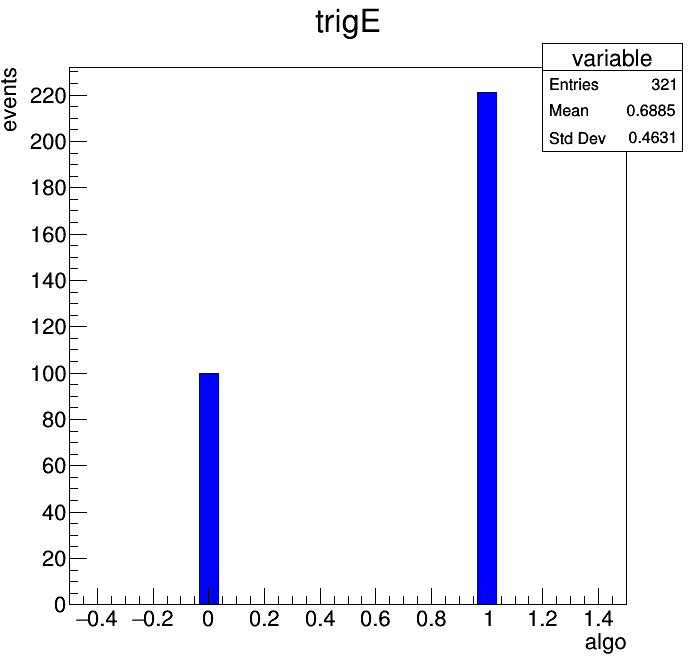

In [17]:
TCanvas *canvas = new TCanvas("c","c",10,10,700,700);
hist->Draw();
canvas->Draw();

In [18]:
/*void HZZAnalysis::SlaveTerminate(){
}*/

In [19]:
//void Terminate(){
    // The Terminate() function is the last function to be called during the
    // analysis of a tree with a selector. It always runs on the client, it can
    // be used to present the results graphically or save the results to file.
    
    // creating the output file
    TString filename_option = sample[0];
    printf("Writting with name option: %s \n", filename_option.Data());
    TString output_name="Output_HZZAnalysis/"+filename_option+".root";
    const char* filename = output_name;
 
    TFile physicsoutput(filename,"recreate");
    WriteHistograms();
    physicsoutput.Close();
//}

Writting with name option: data 
